In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats

df = pd.read_csv('Animation_Movies.csv')

numeric_columns = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']

In [12]:
df2 = pd.DataFrame(columns=['Name','Type','Range','Min','Max','Mean','Mode','Median'])

for i in range(len(numeric_columns)):
    df2.loc[i]={'Name':numeric_columns[i],'Type':df[numeric_columns[i]].dtype,'Range':f"{df[numeric_columns[i]].min()} :{df[numeric_columns[i]].max()} ",'Min':df[numeric_columns[i]].min(),'Max':df[numeric_columns[i]].max(),'Mean':df[numeric_columns[i]].mean(),'Mode':df[numeric_columns[i]].mode(),'Median':df[numeric_columns[i]].median()}


display(df2)



,Name,Type,Range,Min,Max,Mean,Mode,Median
0,budget,int64,0 :260000000,0.0,2.600000e+08,5.759513e+05,"0 0 Name: budget, dtype: int64",0.0
1,revenue,int64,0 :1450026933,0.0,1.450027e+09,1.863464e+06,"0 0 Name: revenue, dtype: int64",0.0
2,runtime,int64,0 :3720,0.0,3.720000e+03,2.090141e+01,"0 0 Name: runtime, dtype: int64",7.0
3,vote_average,float64,0.0 :10.0,0.0,1.000000e+01,2.597083e+00,"0 0.0 Name: vote_average, dtype: float64",0.0
4,vote_count,int64,0 :19463,0.0,1.946300e+04,4.039538e+01,"0 0 Name: vote_count, dtype: int64",0.0


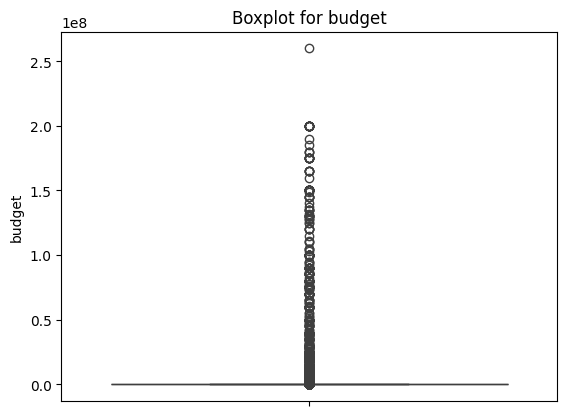

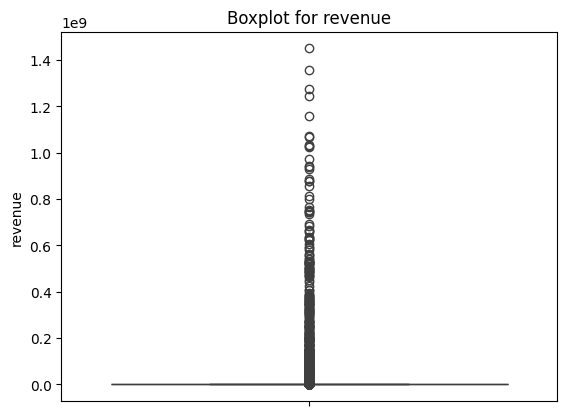

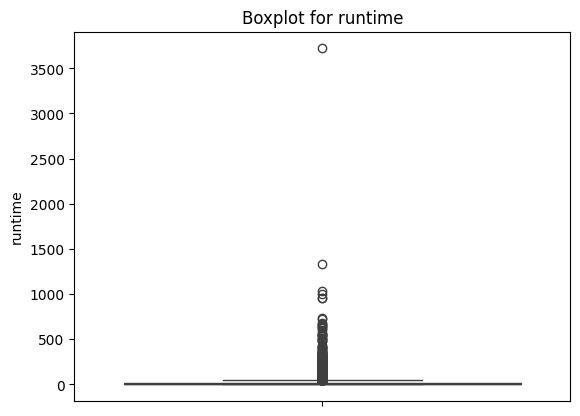

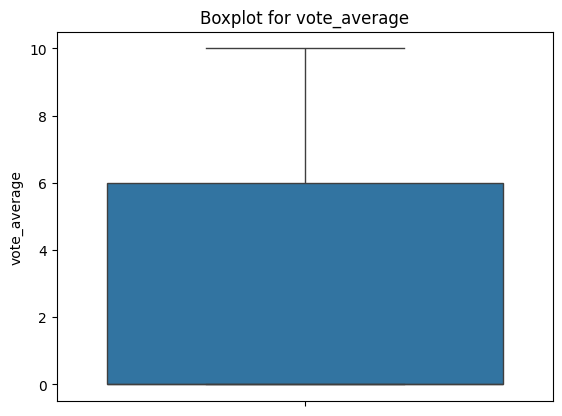

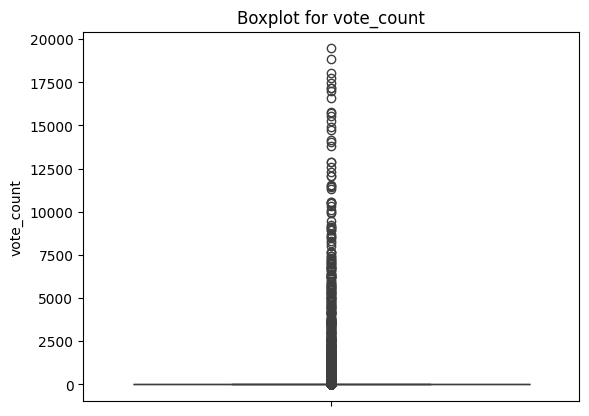

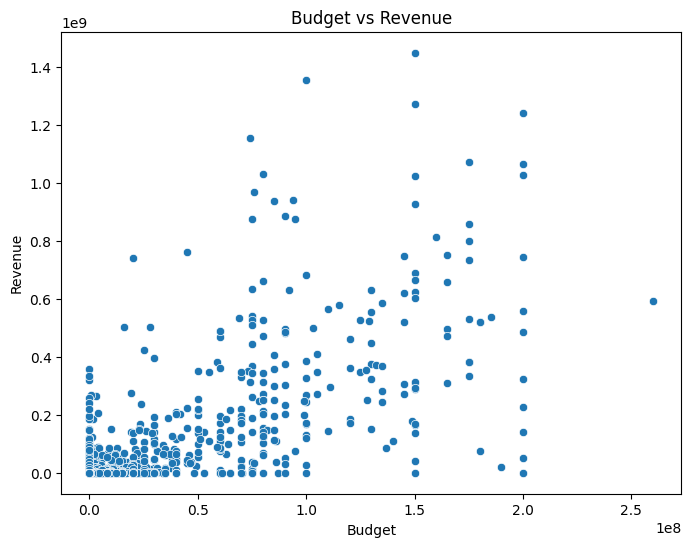

In [3]:
for column in numeric_columns:
    sns.boxplot(df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

In [4]:
correlation = df['budget'].corr(df['revenue'])
print(f'Correlation between Budget and Revenue: {correlation}')

Correlation between Budget and Revenue: 0.7671136231327448


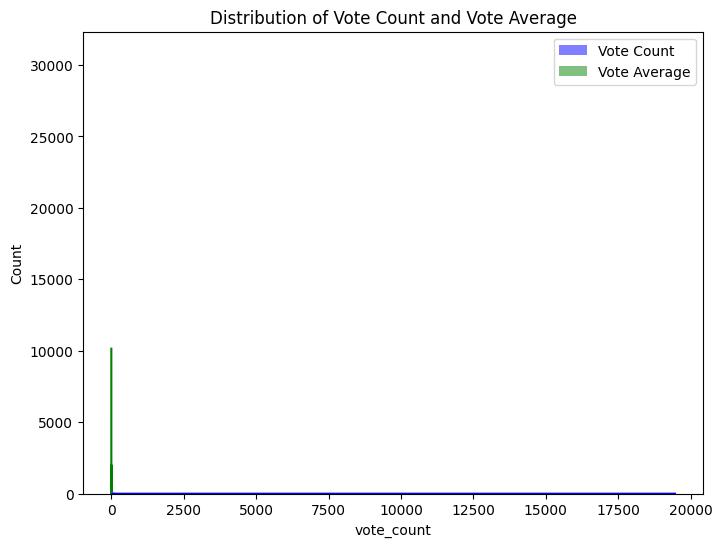

In [5]:
plt.figure(figsize=(8,6))
sns.histplot(df['vote_count'], kde=True, color='blue', label='Vote Count')
sns.histplot(df['vote_average'], kde=True, color='green', label='Vote Average')
plt.legend()
plt.title('Distribution of Vote Count and Vote Average')
plt.show()

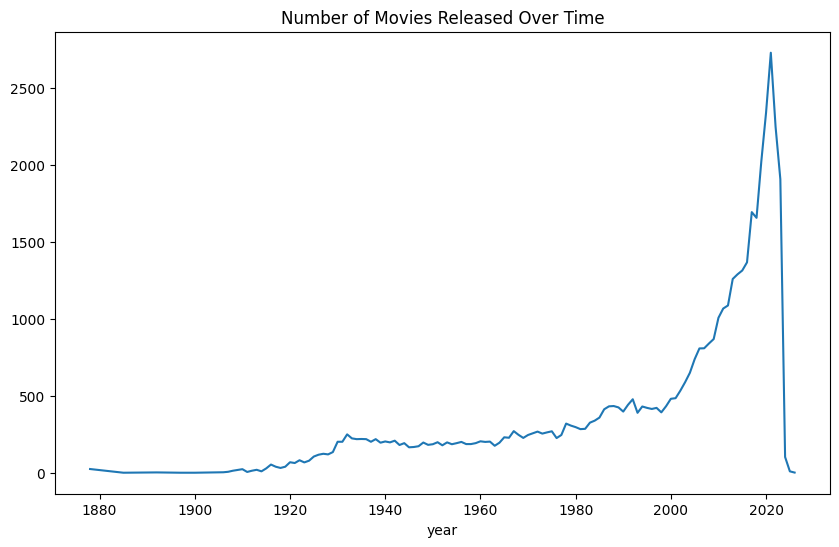

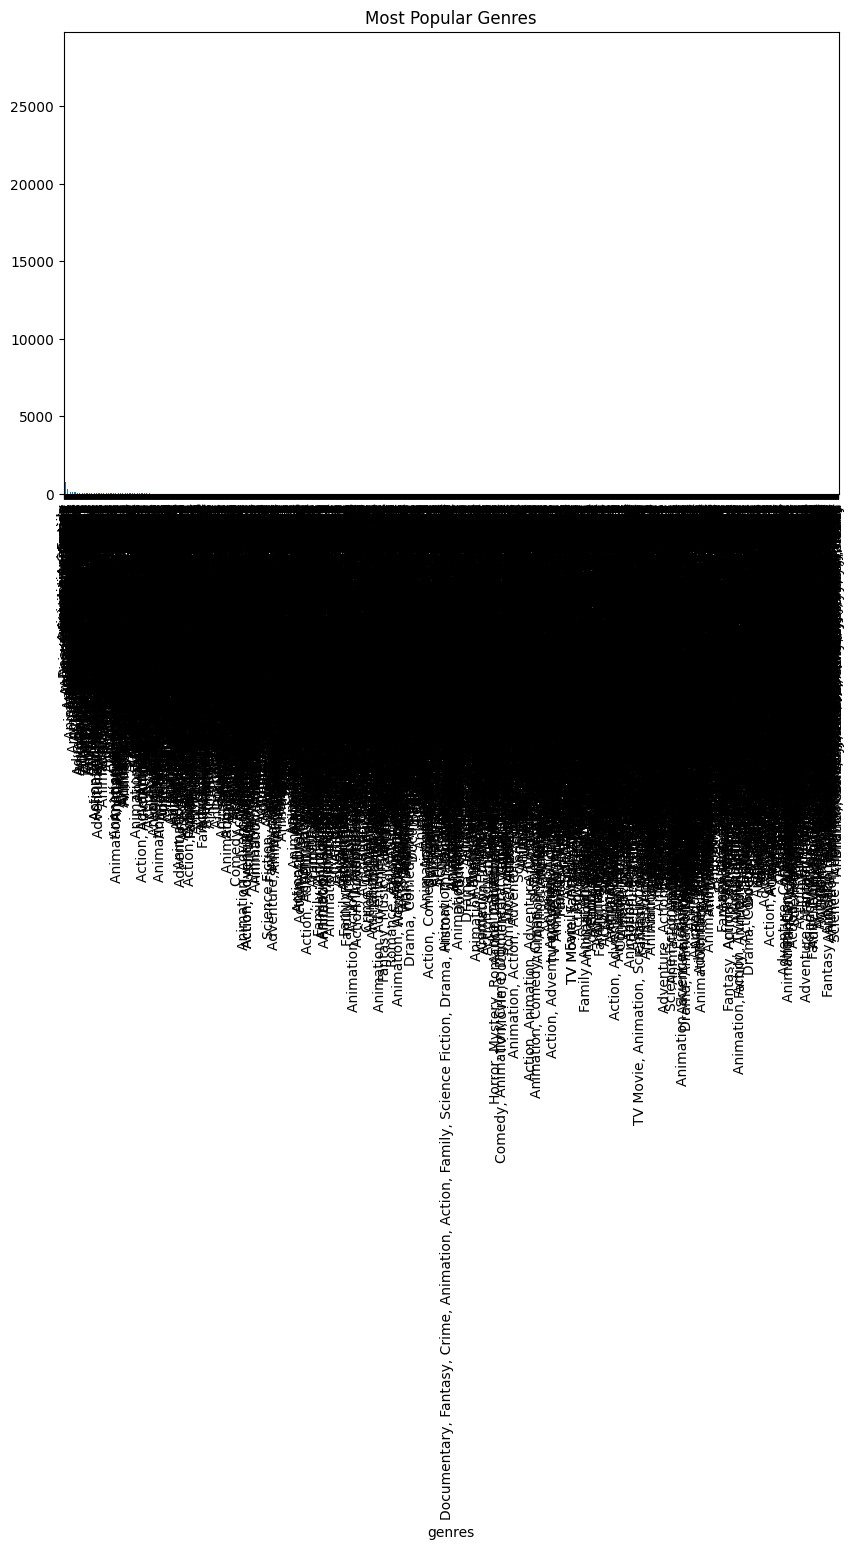

Top Genres by Revenue:
 genres
Animation, Family, Comedy, Fantasy, Adventure            928760770.0
Animation, Family, Adventure, Drama, Comedy              857611174.0
Family, Animation, Fantasy, Music, Comedy, Adventure     800526015.0
Animation, Family, Adventure, Fantasy, Comedy            785815539.0
Comedy, Adventure, Fantasy, Animation, Family            752600867.0
Adventure, Family, Animation, Action, Comedy             657827828.0
Fantasy, Action, Adventure, Animation, Comedy, Family    621537519.0
Animation, Adventure, Family, Fantasy, Comedy, Action    587204668.0
Animation, Adventure, Comedy, Family, Action, Fantasy    538983207.0
Action, Animation, Comedy, Family, Adventure             515776292.5
Name: revenue, dtype: float64
Top Genres by Vote Average:
 genres
Horror, Animation, Drama                                           10.0
Family, Animation, TV Movie, Adventure                             10.0
Comedy, Action, Adventure, Animation, Crime                        10

In [6]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

movies_per_year = df.groupby('year').size()
movies_per_year.plot(kind='line', figsize=(10,6), title='Number of Movies Released Over Time')
plt.show()


df['genres'] = df['genres'].fillna('Unknown')
genres_count = df['genres'].str.split('|').explode().value_counts()
genres_count.plot(kind='bar', figsize=(10,6), title='Most Popular Genres')
plt.show()

top_revenue_genres = df.groupby('genres')['revenue'].mean().sort_values(ascending=False).head(10)
top_vote_genres = df.groupby('genres')['vote_average'].mean().sort_values(ascending=False).head(10)

print("Top Genres by Revenue:\n", top_revenue_genres)
print("Top Genres by Vote Average:\n", top_vote_genres)

In [10]:
inconsistent_budget_revenue = df[(df['budget'].isna()) & (~df['revenue'].isna())]
print(f"Inconsistent rows between budget and revenue:\n{inconsistent_budget_revenue}")


df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


df['release_year'] = df['release_date'].dt.year


decade_bins = pd.cut(df['release_year'], bins=np.arange(1900, 2030, 10))
decade_distribution = df.groupby(decade_bins).size()
print(f"Number of movies in each decade:\n{decade_distribution}")

invalid_budget = df[df['budget'] < 0]
invalid_revenue = df[df['revenue'] < 0]
print(f"Invalid budget values:\n{invalid_budget}")
print(f"Invalid revenue values:\n{invalid_revenue}")

valid_budget_ratio = df['budget'].notna().mean() * 100
valid_revenue_ratio = df['revenue'].notna().mean() * 100
valid_date_release_ratio = df['release_date'].notna().mean() * 100

print(f"Valid budget ratio: {valid_budget_ratio:.2f}%")
print(f"Valid revenue ratio: {valid_revenue_ratio:.2f}%")
print(f"Valid date_release ratio: {valid_date_release_ratio:.2f}%")

# پیشنهادات برای بهبود کیفیت داده‌ها:
# 1. پر کردن مقادیر گم‌شده با میانگین یا میانه‌ی داده‌ها برای ستون‌های budget و revenue.
# 2. استفاده از اطلاعات تاریخی معتبر برای پر کردن مقادیر گم‌شده در date_release.
# 3. حذف یا تصحیح مقادیر پرت (outliers) مانند مقادیر منفی در ستون‌های budget و revenue.


Inconsistent rows between budget and revenue:
Empty DataFrame
Columns: [id, title, vote_average, vote_count, status, release_date, revenue, runtime, adult, backdrop_path, budget, homepage, imdb_id, original_language, original_title, overview, popularity, poster_path, tagline, genres, production_companies, production_countries, spoken_languages, year, release_year]
Index: []

[0 rows x 25 columns]
Number of movies in each decade:
release_year
(1900, 1910]       68
(1910, 1920]      314
(1920, 1930]     1098
(1930, 1940]     2155
(1940, 1950]     1853
(1950, 1960]     1928
(1960, 1970]     2226
(1970, 1980]     2709
(1980, 1990]     3696
(1990, 2000]     4307
(2000, 2010]     7329
(2010, 2020]    15092
dtype: int64
Invalid budget values:
Empty DataFrame
Columns: [id, title, vote_average, vote_count, status, release_date, revenue, runtime, adult, backdrop_path, budget, homepage, imdb_id, original_language, original_title, overview, popularity, poster_path, tagline, genres, production_comp

C:\Users\shaahin\AppData\Local\Temp\ipykernel_8764\242426190.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decade_distribution = df.groupby(decade_bins).size()


Missing Data:
 id                          0
title                       1
vote_average                0
vote_count                  0
status                      0
release_date             2137
revenue                     0
runtime                     0
adult                       0
backdrop_path           36110
budget                      0
homepage                43692
imdb_id                 22393
original_language           0
original_title              1
overview                 6079
popularity                  0
poster_path             14011
tagline                 47267
genres                      0
production_companies    22547
production_countries    12245
spoken_languages        18127
year                     2137
dtype: int64


C:\Users\shaahin\AppData\Local\Temp\ipykernel_8764\2538962889.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[numeric_columns] = df_clean[numeric_columns].fillna(df_clean[numeric_columns].median())
C:\Users\shaahin\AppData\Local\Temp\ipykernel_8764\2538962889.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[numeric_columns] = scaler.fit_transform(df_clean[numeric_columns])
C:\Users\shaahin\AppData\Local\Temp\ipykernel_8764\2538962889.py:18: SettingWithCopyWarning: 
A value is tryin

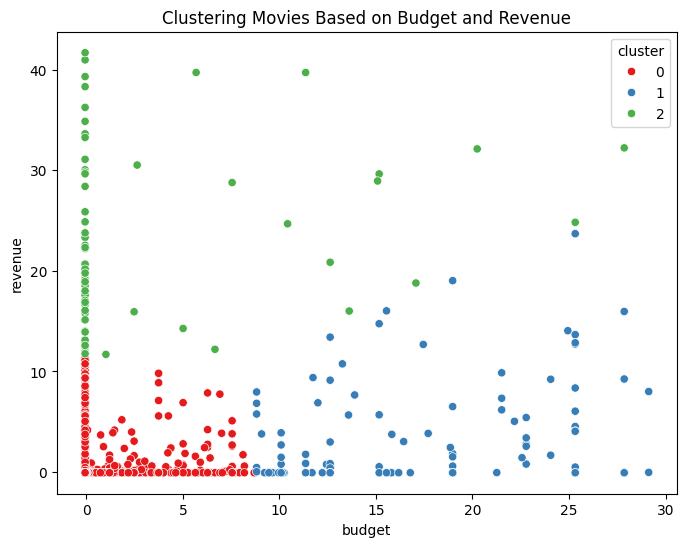

In [7]:
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)


z_scores = np.abs(stats.zscore(df[numeric_columns].dropna()))
df_clean = df[(z_scores < 3).all(axis=1)]


df_clean[numeric_columns] = df_clean[numeric_columns].fillna(df_clean[numeric_columns].median())


scaler = StandardScaler()
df_clean[numeric_columns] = scaler.fit_transform(df_clean[numeric_columns])


X = df_clean[['budget', 'revenue']]
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X)


plt.figure(figsize=(8,6))
sns.scatterplot(x='budget', y='revenue', hue='cluster', data=df_clean, palette='Set1')
plt.title('Clustering Movies Based on Budget and Revenue')
plt.show()


df_clean.to_csv('cleaned_animation_dataset.csv', index=False)